In [1]:
%matplotlib inline
from graph import *
from kernel import *
from svm import SVM
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
db = Database()
d = []
dbA, dbB = db.gen_database_test(9, 5, 5, 3)
N = np.max(dbB[:,0].shape[0])
ker = Kernel(0.9,N)
print(dbA.shape,
dbB.shape)
#https://networkx.github.io/documentation/networkx-1.10/reference/classes.graph.html#networkx.Graph

(30, 2) (30, 2)


In [7]:
db_lab, db_nolab = db.gen_database_test(9, 10, 5, 5)
assert db_nolab[0,0].all()==np.sum(db_lab[0,0],axis=0).all()
s = SVM(db_lab, 0.7, 0.9, kernel="raw_kernel")
s.learn()
s2 = SVM(db_nolab, 0.7, 0.9, kernel="raw_kernel")
s2.learn()
print("Lab score",s.score()," & nolab score",s2.score())

Lab score 0.30000000000000004  & nolab score 0.4


In [3]:
%%timeit
plt.clf()
plt.title("Raw")
sns.heatmap(ker.build_gram_matrix(db2[:,0],kernel=ker.raw_kernel))

NameError: name 'plt' is not defined

764 ms ± 277 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


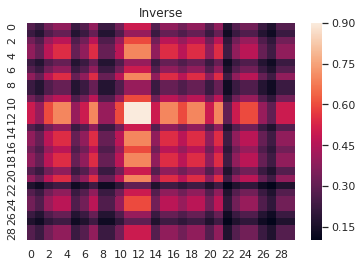

In [10]:
%%timeit
plt.clf()
plt.title("Inverse")
sns.heatmap(ker.build_gram_matrix(db2[:,0],kernel=ker.inv_kernel))

1.05 s ± 470 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


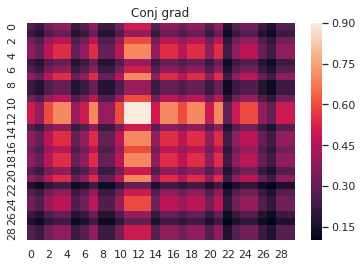

In [11]:
%%timeit
plt.clf()
plt.title("Conj grad")
sns.heatmap(ker.build_gram_matrix(db2[:,0],kernel=ker.conj_grad_kernel))

1.5 s ± 177 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


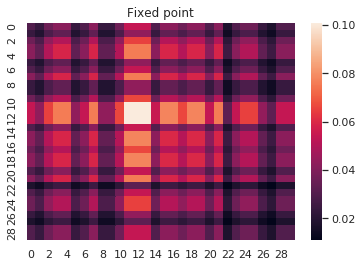

In [12]:
%%timeit
plt.clf()
plt.title("Fixed point")
sns.heatmap(ker.build_gram_matrix(db2[:,0],kernel=ker.fixed_point_kernel))

1.66 s ± 431 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


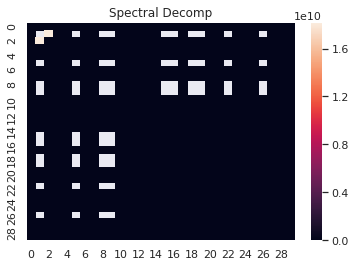

In [13]:
%%timeit
plt.clf()
plt.title("Spectral Decomp")
sns.heatmap(ker.build_gram_matrix(db2[:,0],kernel=ker.spec_decomp_kernel))

In [2]:
%%time
db = Database()
d = []
N = 30
for _ in range(N):
    db2 = db.gen_database_test(9, 5, 5, 3)
    s = SVM(db2, 0.7, 0.9, kernel="inv_kernel")
    d.append(s.cross_val_score(5))
print("Mean acc = ",sum([x["accuracy"] for x in d])/N)
print("Mean time = ",sum([x["time"] for x in d])/N)
print("Mean std = ",sum([x["stddev"] for x in d])/N)
#rajouter labels
# somme de k = Wx.shape ou 10xWx.shape ne change rien
#normalisé bcp plus rapide (pas toujour)
# certains ont un meilleur score avec d'autres que eux mêmes 
#affichage des graphes et dérouler l'algo à la main pour les carrés noir
#faire avec labels 2~5 et essayer d'avoir des distributions de labels pas trop différentes entre les toplogies

Mean acc =  0.49999999999999994
Mean time =  0.46909941037495934
Mean std =  0.16049890296262528
CPU times: user 25.4 s, sys: 29.2 s, total: 54.7 s
Wall time: 14.6 s


In [5]:
dbA.shape

(42, 2)

## All graphs
Star

/home/leo/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


{(0, 1): Text(0.5004489947681383, -0.0631456812246146, '0'),
 (0, 2): Text(0.21666214145835985, 0.45516242706461063, '0'),
 (0, 3): Text(-0.4434174099617297, -0.24038158958772482, '1'),
 (0, 4): Text(0.0929678011208039, -0.49710482353982804, '0'),
 (0, 5): Text(-0.36486554831301904, 0.34864656452152, '2')}

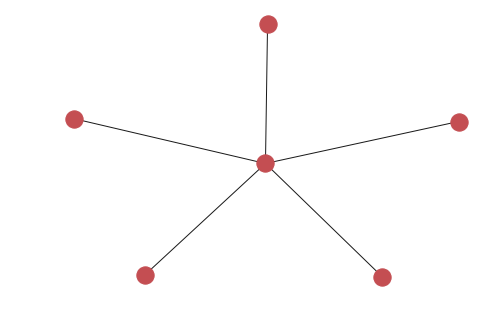

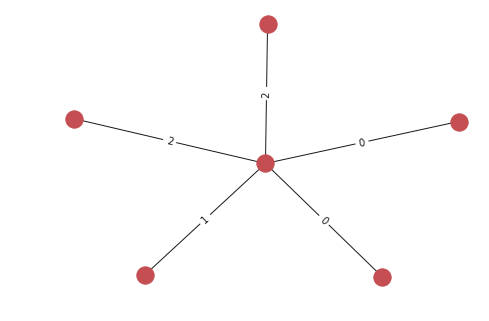

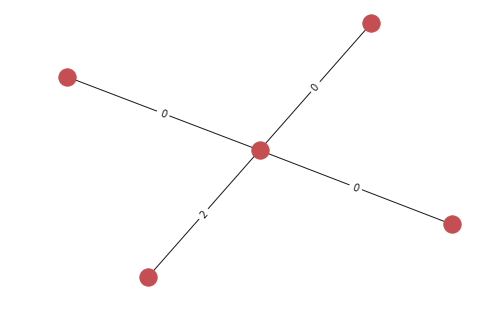

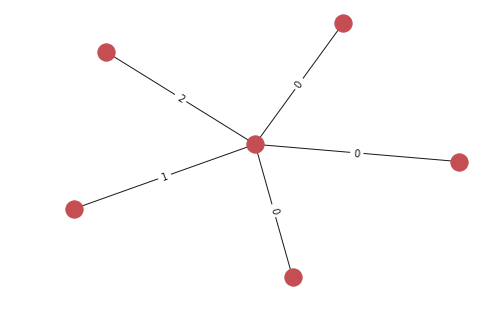

In [4]:
G = db.gen_graph("star",5,3)
pos=nx.spring_layout(G)
nx.draw(G,pos)
plt.figure()
nx.draw(G,pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G.edges(data=True)})

G2=db.alter_graph_struct(G,"star",2)
plt.figure()
pos=nx.spring_layout(G2)
nx.draw(G2,pos)
nx.draw_networkx_edge_labels(G2,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G2.edges(data=True)})

G3=db.alter_graph_labels(G,2)
print(G3)
plt.figure()
pos=nx.spring_layout(G3)
nx.draw(G3,pos)
nx.draw_networkx_edge_labels(G3,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G3.edges(data=True)})

Ring

{(0, 1): Text(0.28785011263431903, -0.755632000556822, '1'),
 (0, 4): Text(0.8090539898097158, 0.045410319715499525, '1'),
 (1, 2): Text(-0.6295078042926798, -0.5100827578848259, '1'),
 (2, 3): Text(-0.6795461855170358, 0.4382457135210754, '0'),
 (3, 4): Text(0.21214988736568108, 0.7820587252050737, '2')}

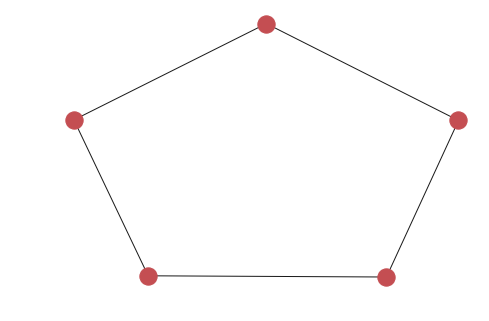

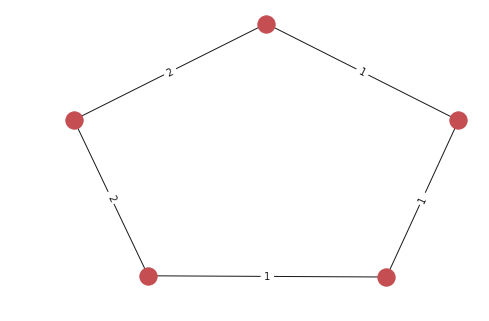

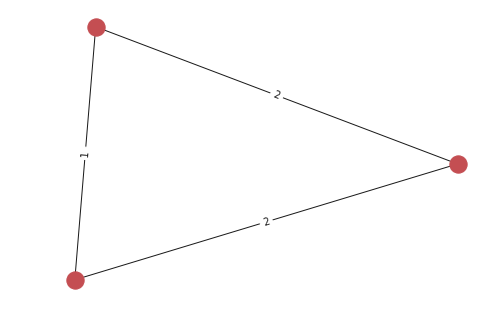

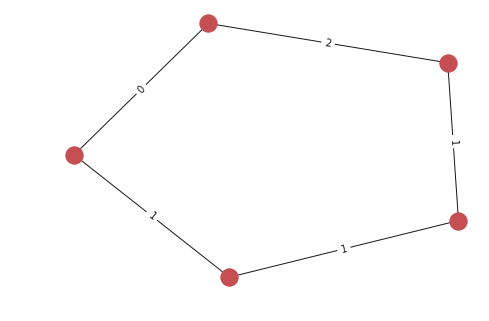

In [6]:
G = db.gen_graph("ring",5,3)
pos=nx.spring_layout(G)
nx.draw(G,pos)
plt.figure()
nx.draw(G,pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G.edges(data=True)})

G2=db.alter_graph_struct(G,"ring",2)
plt.figure()
pos=nx.spring_layout(G2)
nx.draw(G2,pos)
nx.draw_networkx_edge_labels(G2,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G2.edges(data=True)})

G3=db.alter_graph_labels(G,2)
print(G3)
plt.figure()
pos=nx.spring_layout(G3)
nx.draw(G3,pos)
nx.draw_networkx_edge_labels(G3,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G3.edges(data=True)})

Tree

{(0, 1): Text(0.3235720871908117, -0.0843118760923326, '0'),
 (0, 2): Text(-0.11013126863533995, 0.18692724822636958, '0'),
 (1, 3): Text(0.7272170265193644, -0.19633726238806853, '1'),
 (1, 4): Text(0.5288388341299762, -0.45607503826472495, '0'),
 (2, 5): Text(-0.4679360122396086, 0.1765295667275183, '1'),
 (2, 6): Text(-0.4868632129231075, 0.49550044345629396, '0'),
 (4, 7): Text(0.4472405210931443, -0.838671814416798, '0'),
 (6, 8): Text(-0.7653657343433979, 0.8253881623217538, '2')}

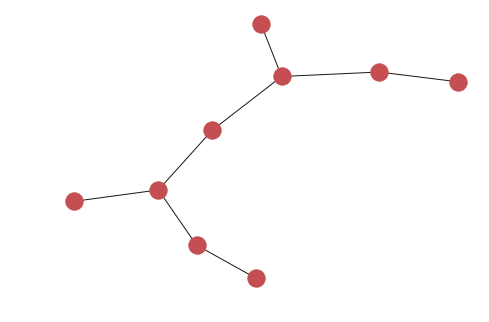

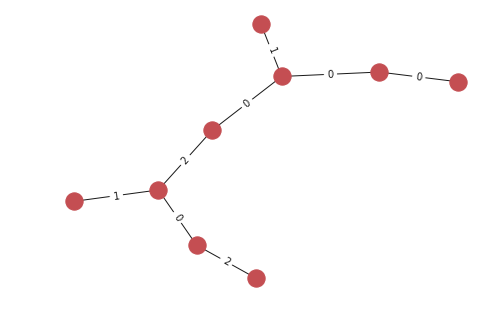

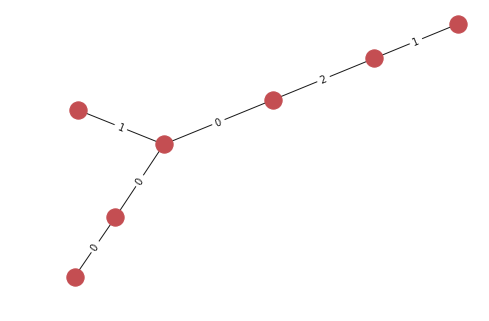

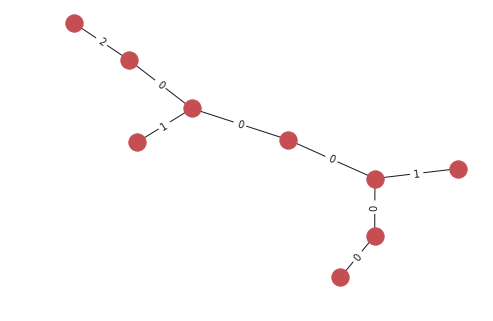

In [12]:
G = db.gen_graph("tree",9,3)
pos=nx.spring_layout(G)
nx.draw(G,pos)
plt.figure()
nx.draw(G,pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G.edges(data=True)})

G2=db.alter_graph_struct(G,"tree",2)
plt.figure()
pos=nx.spring_layout(G2)
nx.draw(G2,pos)
nx.draw_networkx_edge_labels(G2,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G2.edges(data=True)})

G3=db.alter_graph_labels(G,2)
print(G3)
plt.figure()
pos=nx.spring_layout(G3)
nx.draw(G3,pos)
nx.draw_networkx_edge_labels(G3,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G3.edges(data=True)})